Combination of using Euler's method of approximation 2D linear motion and Euler-Cromer's method.

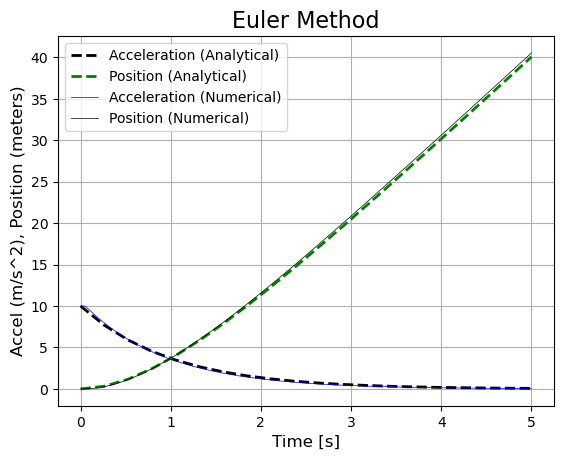

<Figure size 640x480 with 0 Axes>

In [69]:
"""
Explaination:
This is an approximation utilizing Euler style approximation. Variables can be 
manipulated to better suite the situation. Great use as a stencil, but
approximation falls-off as the amount of data points grow.

@author: Steven Bates
"""
import numpy as np
import matplotlib.pyplot as plt


c= 1                 #variable switch to 'c' from 'alpha'
v0 = 0
x0= 0
t= 0
dt= 0.05

v_max = 10
vel = (v_max - v0)

###############################################################################
############################## Analytical Solution ############################
###############################################################################

tt = np.linspace(0,5,20)

accel = c*vel*np.exp(-c*tt)
position = x0 + v0*tt + vel*(tt + (np.exp(-c*tt) - 1)/c)

###############################################################################
############################# Numerical Solution ##############################
###############################################################################

t_values=[]
a_values=[]
v_values=[]
x_values=[]
k= np.exp(-c*t)
a0= 0


while t <= 5:
    v = (v_max - v0)
    vv= v0 + a0*dt
    aa= c*v*k
    xx= x0 + v0*dt
    v_values.append(vv)
    a_values.append(aa)
    t_values.append(t)
    x_values.append(xx)
    a0= aa
    v0= vv
    t= t+dt
    x0= xx

###############################################################################
############################### Plotting ######################################
###############################################################################

plt.plot(tt, accel, 'k--', label= 'Acceleration (Analytical)', linewidth= 2)
plt.plot(tt, position, 'g--', label= 'Position (Analytical)', linewidth= 2) 

plt.plot(t_values, a_values, 'b-', label= 'Acceleration (Numerical)', linewidth= 0.5)
plt.plot(t_values, x_values, 'k-', label= 'Position (Numerical)', linewidth= 0.5) 

plt.title("Euler Method", size=16) 
plt.xlabel('Time [s]', size=12)
plt.ylabel('Accel (m/s^2), Position (meters)', size=12)
plt.legend(loc='best')
plt.grid()
plt.show()

plt.savefig('Euler Approxmiation plot.png')

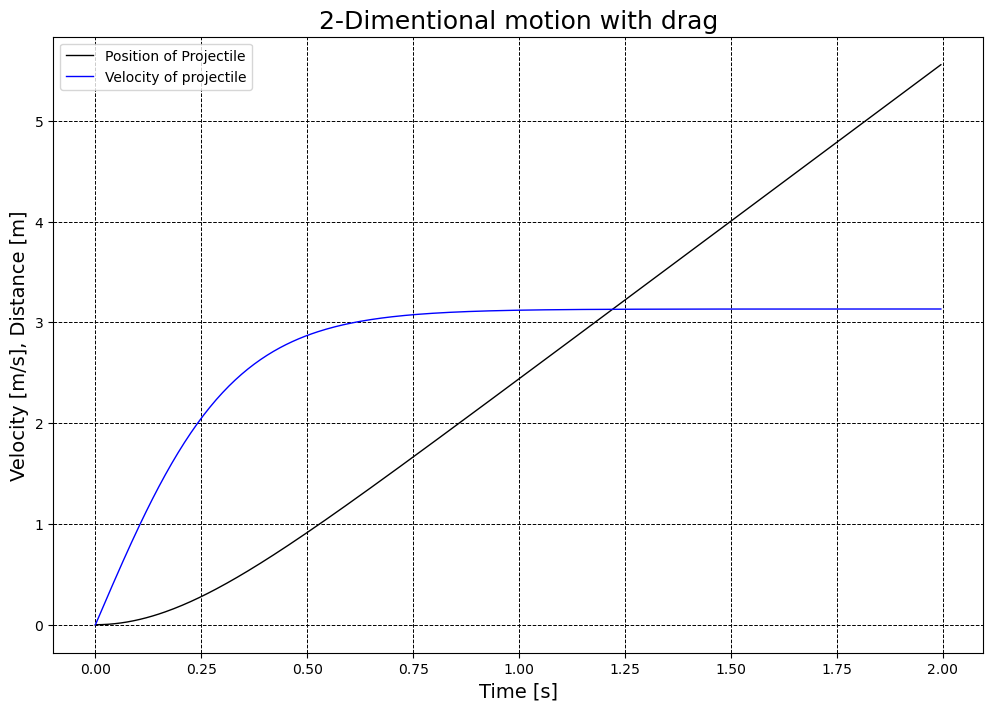

<Figure size 640x480 with 0 Axes>

In [79]:
"""
Explaination:
Solving the motion using drag.

@author: Steven Bates
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


g = 9.81                    # gravity (negative is in equation)
theta= 0.78                 # angle in radians
v0 =0
m= 1                        # mass in [kg]
beta= 1                     # Entire Drag-constant applied to projectile

x0= 0
y0= 0
v0x= v0*np.sin(theta)
v0y= v0*np.cos(theta)
dt= 0.005

def f_func(instant,time):
    f = np.zeros(4)
    f[0] = instant[2]                                      # f[0] = new v0x
    f[1] = instant[3]                                      # f[1] = new v0y
    f[2] = -(beta/m)*(f[0]**2 + f[1]**2)**(1/2)*f[0]       #x-velocity
    f[3] = -g - (beta/m)*(f[0]**2 + f[1]**2)**(1/2)*f[1]   #y-velocity
    return f

R_0 = [ x0, y0, v0x, v0y]

t = np.arange(0,2, 0.005)   
R = odeint(f_func,R_0,t)

x = R[:,0]  
y = R[:,1] 
v_x = R[:,2] 
v_y = R[:,3]

s= (x**2 + y**2)**0.5
u= (v_x**2 +v_y**2)**0.5

plt.figure(figsize= (12,8))
plt.plot(t, s, 'k-', label= 'Position of Projectile', linewidth= 1) 
plt.plot(t, u, 'b-', label= 'Velocity of projectile', linewidth= 1)
plt.title("2-Dimentional motion with drag", color='k', size=18)
plt.xlabel('Time [s]', color= 'k', size=14)
plt.ylabel('Velocity [m/s], Distance [m]', color= 'k', size=14)
plt.legend(loc='best')
plt.grid(color= 'k', linestyle= '--', linewidth=0.7)
plt.show()

plt.savefig('2-dimentional projectial motion with drag.png')


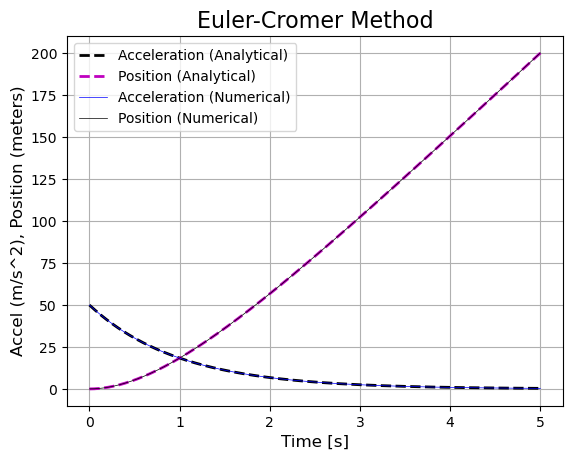

<Figure size 640x480 with 0 Axes>

In [75]:
"""
Explaination:
This is a usage of the Euler-Cromer approximation to give a more accurate
approximation compared the the Euler method.

@author: Steven Bates
"""
import numpy as np
import matplotlib.pyplot as plt

c= 1                                 # Switched 'alpha' for 'c'
v0 = 0
x0= 0
t= 0
dt= 0.001

v_max = 50
veldif = (v_max - v0)


###############################################################################
############################## Analytical Solution ############################
###############################################################################

tt = np.arange(t, 5, dt)

accel = c*veldif*np.exp(-c*tt)
position = x0 + v0*tt + veldif*(tt + (np.exp(-c*tt) - 1)/c)

###############################################################################
############################# Numerical Solution ##############################
###############################################################################

t_values=[]
a_values=[]
v_values=[]
x_values=[]
k= np.exp(-c*dt)
a0= 0

while t <= 5:
    v = (v_max - v0)
    vv= v0 + a0*dt
    aa= c*v*k
    xx= x0 + vv*dt
    t_values.append(t)
    a_values.append(aa)
    v_values.append(vv)
    x_values.append(xx)
    a0= aa
    v0= vv
    t= t+dt
    x0= xx


###############################################################################
################################## Plotting ###################################
###############################################################################

plt.plot(tt, accel, 'k--', label= 'Acceleration (Analytical)', linewidth= 2)
plt.plot(tt, position, 'm--', label= 'Position (Analytical)', linewidth= 2) 

plt.plot(t_values, a_values, 'b-', label= 'Acceleration (Numerical)', linewidth= 0.5)
plt.plot(t_values, x_values, 'k-', label= 'Position (Numerical)', linewidth= 0.5) 

plt.title("Euler-Cromer Method", size=16) 
plt.xlabel('Time [s]', size=12)
plt.ylabel('Accel (m/s^2), Position (meters)', size=12)
plt.legend(loc='best')
plt.grid()
plt.show()

plt.savefig('Euler-Cromer Approxmiation plot.png')

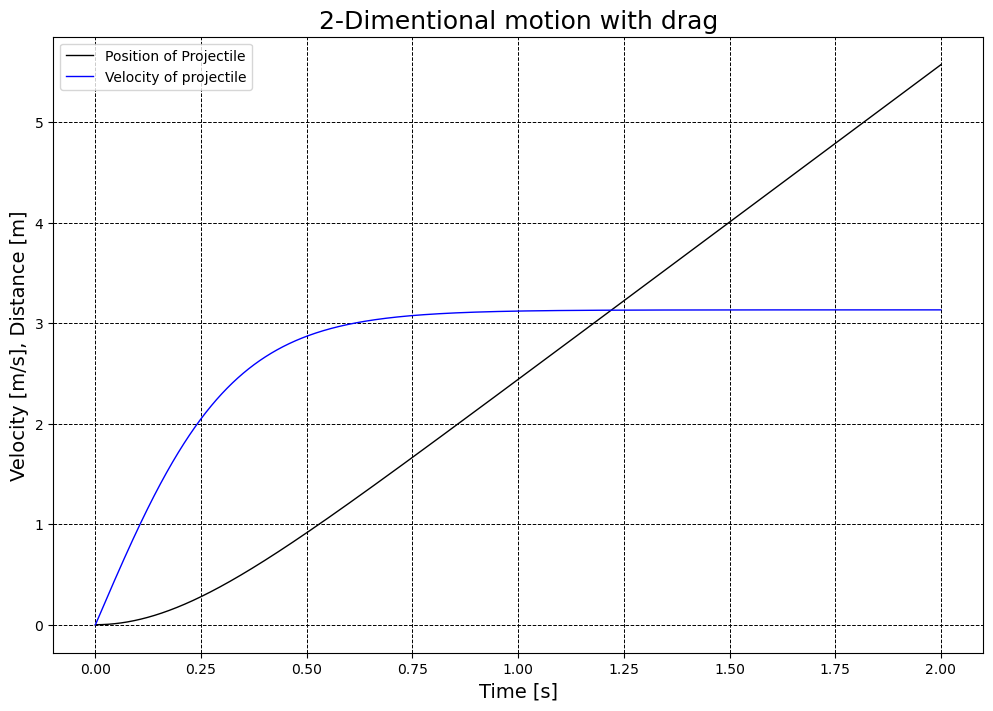

<Figure size 640x480 with 0 Axes>

In [77]:
"""
Explaination:
Solving the motion using drag and ordinary differential equations import (Scipy).

@author: Steven Bates
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


g = 9.81                    # gravity (negative is in equation)
theta= 0.78                 # angle in radians
v0 =0
m= 1                        # mass in [kg]
beta= 1                     # Entire Drag-constant applied to projectile

x0= 0
y0=0
v0x= v0*np.sin(theta)
v0y= v0*np.cos(theta)
dt= 0.005


def f_func(instant,time):
    f = np.zeros(4)
    f[0] = instant[2]                                      # f[0] = new v0x
    f[1] = instant[3]                                      # f[1] = new v0y
    f[2] = -(beta/m)*(f[0]**2 + f[1]**2)**(1/2)*f[0]       #x-velocity
    f[3] = -g - (beta/m)*(f[0]**2 + f[1]**2)**(1/2)*f[1]   #y-velocity
    return f

R_0 = [ x0, y0, v0x, v0y]

t = np.arange(0,2, 0.00005)   
R = odeint(f_func,R_0,t)

x = R[:,0]  
y = R[:,1] 
v_x = R[:,2] 
v_y = R[:,3]

s= (x**2 + y**2)**0.5
u= (v_x**2 +v_y**2)**0.5

plt.figure(figsize= (12,8))
plt.plot(t, s, 'k-', label= 'Position of Projectile', linewidth= 1) 
plt.plot(t, u, 'b-', label= 'Velocity of projectile', linewidth= 1)
plt.title("2-Dimentional motion with drag", color='k', size=18)
plt.xlabel('Time [s]', color= 'k', size=14)
plt.ylabel('Velocity [m/s], Distance [m]', color= 'k', size=14)
plt.legend(loc='best')
plt.grid(color= 'k', linestyle= '--', linewidth=0.7)
plt.show()

plt.savefig('2-dimentional projectial motion with drag.png')
